In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

https://github.com/fivethirtyeight/data/tree/master/college-majors

ach row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

    Do students in more popular majors make more money?
        Using scatter plots
    How many majors are predominantly male? Predominantly female?
        Using histograms
    Which category of majors have the most students?
        Using bar plots


In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

In [2]:
recent_grads=pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count=recent_grads.shape[0]
print(raw_data_count)

173


In [7]:
recent_grads=recent_grads.dropna(axis=0)
cleaned_data_count=recent_grads.shape[0]
print(cleaned_data_count)

172


Untersuchung von Zusammenhängen

    Do students in more popular majors make more money?
    Do students that majored in subjects that were majority female make more money?
    Is there any link between the number of full-time employees and median salary?


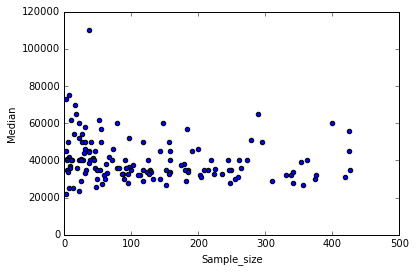

In [8]:
#75% aller Werte von sample_size befinden sich im Range bis ~300, folglich ist eine Eingrenzung zur besseren visuellen Abklärung möglich
#ohne die Ergebnisse zu verzerren
recent_grads.plot(x="Sample_size",y="Median",kind="scatter",xlim=(0,500))

Do students in more popular majors make more money?

Auf den ersten Blick besteht der Verdacht auf einen mild-negativen/ nicht-signfikanten Zusammenhang zwischen der Popularität eines Studienfaches und dem Median-Einkommen.

Die Aussage muss auf den ersten Blick angezweifelt werden.

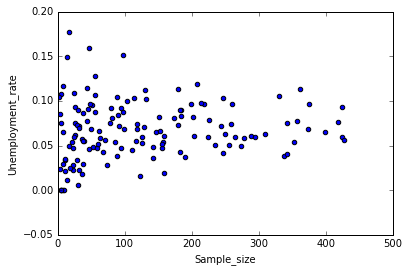

In [9]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter",xlim=(0,500))

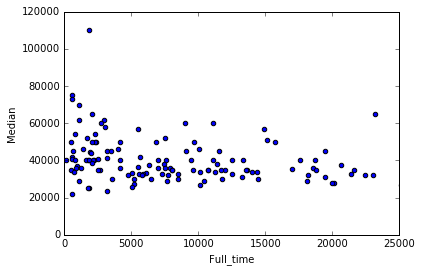

In [10]:
#Ca. 75% der Full_time Daten liegen unter 25000
recent_grads.plot(x="Full_time",y="Median",kind="scatter",xlim=(0,25000))

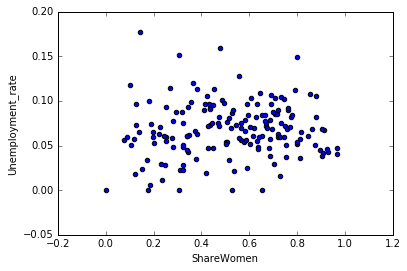

In [11]:
recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter")

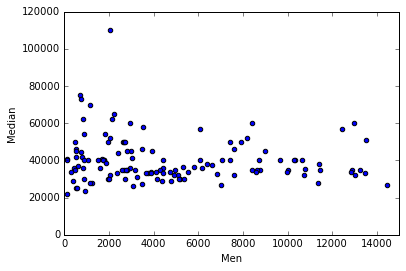

In [12]:
#Men 15000
recent_grads.plot(x="Men",y="Median",kind="scatter",xlim=(0,15000))

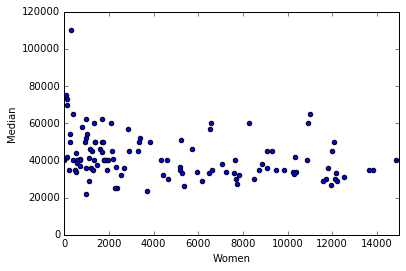

In [13]:
recent_grads.plot(x="Women",y="Median",kind="scatter",xlim=(0,15000))

Do students that majored in subjects that were majority female make more money?

Um diese Frage zu beantworten, werde ich der Aufgabenstellung einen weiteren Plot hinzufügen.

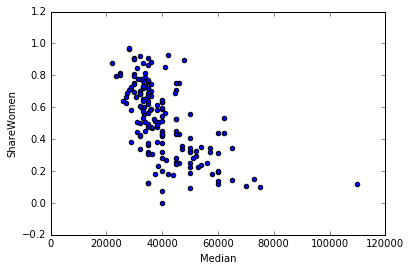

In [14]:
recent_grads.plot(x="Median",y="ShareWomen",kind="scatter")

Es zeigt sich ein klarer negativer Zusammenhang zwischen dem Frauenanteil und dem Median-Einkommen. Die Hypothese muss auf den ersten Blick also zurückgewiesen werden.

Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

    Sample_size
    Median
    Employed
    Full_time
    ShareWomen
    Unemployment_rate
    Men
    Women


Use the plots to explore the following questions:

    What percent of majors are predominantly male? Predominantly female?
    What's the most common median salary range?


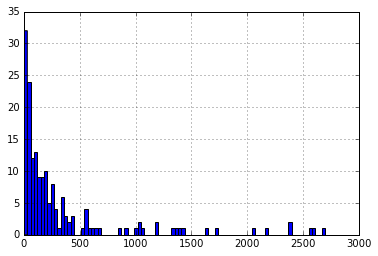

In [15]:
recent_grads["Sample_size"].hist(bins=100,range=(0,3000))

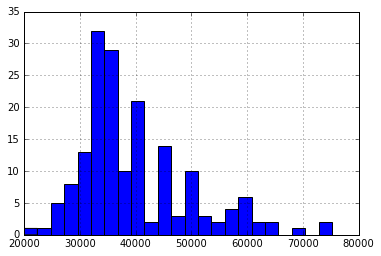

In [16]:
recent_grads["Median"].hist(bins=25,range=(20000,80000))

What's the most common median salary range?

Bei meiner Kategorisierung (80000/25=3200) liegt die häufigste Median-Range bei ca. 32200-35400 $

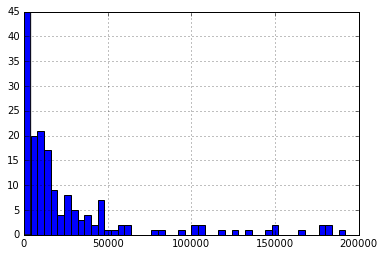

In [17]:
recent_grads["Employed"].hist(bins=50,range=(0,200000))

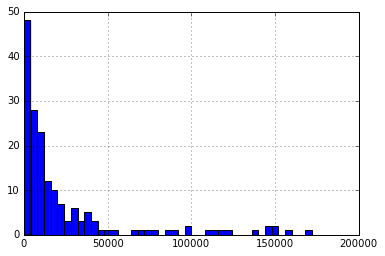

In [18]:
recent_grads["Full_time"].hist(bins=50,range=(0,200000))

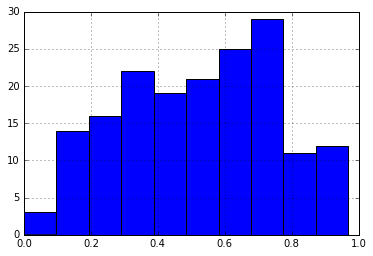

In [19]:
recent_grads["ShareWomen"].hist(bins=10)

What percent of majors are predominantly male? Predominantly female?

Diese Frage kann man so schwer beantworten. Insgesamt gibt es im DAtensatz 172 Fächer.
Hiervon haben ca.
<10% 3
<20% 14
<30% 16
<40% 22
Insgesamt 55

<70 25
<80 29
<90 11
<100 12
Insgesamt 77

Ungewichtet(!) ergibt sich hierdurch eine größere Anzahl an hauptsächlich weiblichen Studienfächern.
Eine genauere Beantwortung dieser Frage würde ich nicht graphisch lösen. Folglich lasse ich sie im Detail erstmal unbeantwortet und löse sie so:

In [20]:
recent_grads[recent_grads["ShareWomen"]>.50].shape[0]/172

0.5581395348837209

Ca. 56% der Studienfächer haben einen Frauenanteil von über 50%. Folglich liegen in 44% der Studienfächer der Männeranteil >=50%

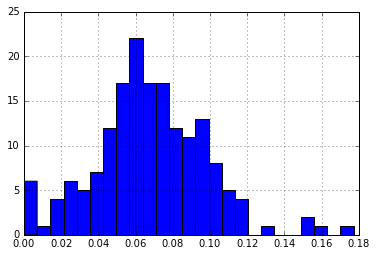

In [21]:
recent_grads["Unemployment_rate"].hist(bins=25)

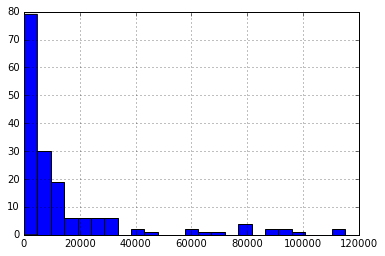

In [22]:
recent_grads["Men"].hist(bins=25,range=(0,120000))

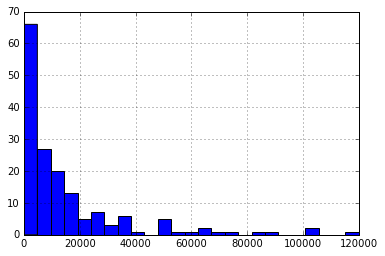

In [23]:
recent_grads["Women"].hist(bins=25,range=(0,120000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ba9f3a90>,
      dtype=object)

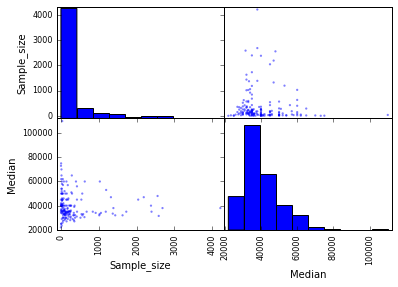

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ba7eb1d0>,
      dtype=object)

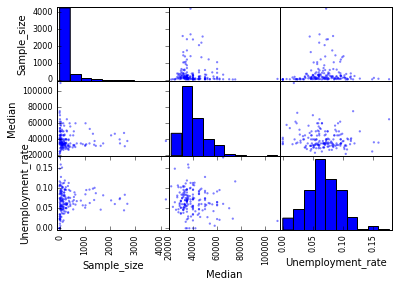

In [25]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]])

Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe

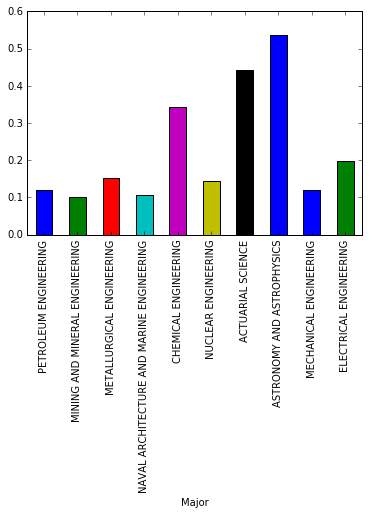

In [26]:
recent_grads[:10].plot.bar(x="Major",y="ShareWomen",legend=False)

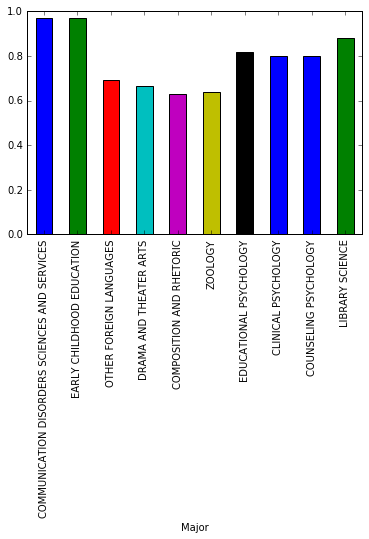

In [27]:
recent_grads[-10:].plot.bar(x="Major",y="ShareWomen",legend=False)

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [28]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [29]:
recent_grads["Major_category"].describe(include="all")

count             172
unique             16
top       Engineering
freq               29
Name: Major_category, dtype: object

In [30]:
# Möglichkeit der Darstellung. Durchschnitt bilden.

share_women_category_m={}
for i in recent_grads["Major_category"].unique():
    share_women_category_m[i]=recent_grads.loc[recent_grads["Major_category"]==i,"ShareWomen"].mean()
    
share_women_c_m_df=pd.DataFrame.from_dict(share_women_category_m,orient="index")
share_women_c_m_df.columns=["ShareWomen_mean"]
share_women_c_m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Psychology & Social Work to Agriculture & Natural Resources
Data columns (total 1 columns):
ShareWomen_mean    16 non-null float64
dtypes: float64(1)
memory usage: 256.0+ bytes


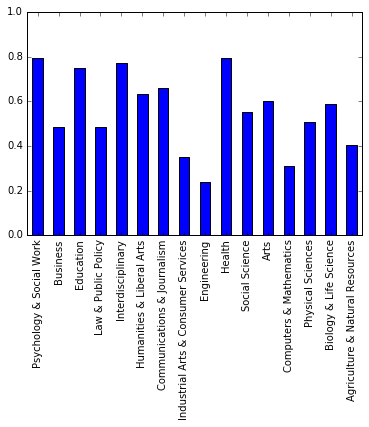

In [31]:
share_women_c_m_df.plot.bar(legend=False,ylim=(0,1))

In [32]:
#Eine aufgeschlüsselte Analyse wäre aufgrund von 172 Fächern nicht in einer Grafik abbildbar.
#Exemplarisch wird dies anhand einer Kategorie (Computers & Mathematics) aufgezeigt.

share_w_c_m=recent_grads.loc[recent_grads["Major_category"]=="Computers & Mathematics",["Major","ShareWomen"]]
share_w_c_m

,Major,ShareWomen
20,COMPUTER SCIENCE,0.222695
41,MATHEMATICS,0.448099
42,COMPUTER AND INFORMATION SYSTEMS,0.253583
45,INFORMATION SCIENCES,0.244103
46,STATISTICS AND DECISION SCIENCE,0.526476
47,APPLIED MATHEMATICS,0.434298
52,MATHEMATICS AND COMPUTER SCIENCE,0.178982
53,COMPUTER PROGRAMMING AND DATA PROCESSING,0.269194
81,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,0.180883
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.305005


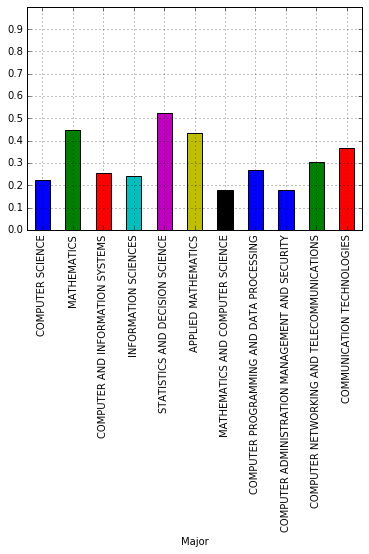

In [33]:
share_w_c_m.plot.bar(x="Major",y="ShareWomen",ylim=(0,1),legend=False,grid=True,yticks=np.arange(0,1,.1))

Use a box plot to explore the distributions of median salaries and unemployment rate.

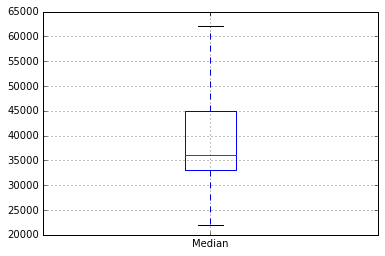

In [43]:
recent_grads["Median"].plot.box(ylim=(20000,65000),yticks=np.arange(20000,80000,5000),grid=True)

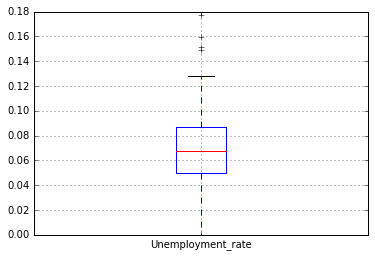

In [45]:
recent_grads["Unemployment_rate"].plot.box(grid=True)

    Aus welchen Fächern setzen sich diese Extremen Ausreißer in der Arbeitslosenquote zusammen?

In [49]:
recent_grads.sort_values(by=["Unemployment_rate"],ascending=False).head(7)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,847,2952,789,0.159491,36000,23000,60000,919,2313,496
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1447,4369,1100,0.151850,36400,27000,49000,2593,2941,352
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340
105,106,2001,COMMUNICATION TECHNOLOGIES,18035.0,11431.0,6604.0,Computers & Mathematics,0.366177,208,14779,...,4690,9085,2006,0.119511,35000,25000,45000,4545,8794,2495
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.